## SPCM Gating time Test

In [1]:
from matplotlib import pyplot as plt
import matplotlib as mpl
import csv
import numpy as np
import os,sys
import PIL # for reading tif images
import h5py
import datetime as dt
import time
from scipy.ndimage  import gaussian_filter
from skimage.filters import threshold_otsu

import psycopg2 as pg
from configparser import ConfigParser

# for using datetime on x axis
import matplotlib.dates as mdates
import matplotlib.units as munits
munits.registry[dt.datetime] = mdates.ConciseDateConverter()


# results = "C:\\Networking Experiment\\artiq codes\\artiq-master\\results\\"

sys.path.append("..\\")

from h5_data_utilities import * # helper functions for dealing with h5 files



### 2025.01.06 Excitation Realgined

In [18]:
fnames = get_files_by_criteria(date_filters=["2025-01-06","2025-01-07"], # only find files from these date directories
                               name_filters=["SPCM"], # only find files containing all these strings
                               condition=lambda filename: True, # use this to filter by experiment parameters, like this: lambda filename: np.bool_(h5py.File(filename)['datasets']['set_current_coil_volts_at_finish'])
                               start_dir=results,
                               include_path=True, # if False, only return the name of the file, not the full path
                               print_filenames=True
)

only_show_i_greater_than = -1

print(f"found {len(fnames)} files")
for i,f in enumerate(fnames):
    ds = h5py.File(os.path.join(results, f))['datasets']
    print(f"file {i} ({f})")
    # scan_str = str_from_h5(ds['scan_variable1_name'])
    # if str_from_h5(ds['scan_variable2_name']) != '':
    #     scan_str += ", " +str_from_h5(ds['scan_variable2_name'])
    # print(f"file {i} ({f}) scanned over "+scan_str)


found 2 files
file 0 (C:\Networking Experiment\artiq codes\artiq-master\results\2025-01-06\21\000021336-ExcitationSPCMGateStartTime.h5)
file 1 (C:\Networking Experiment\artiq codes\artiq-master\results\2025-01-06\21\000021337-ExcitationSPCMGateStartTime.h5)


### Excitation Pulse = 20ns, n_measurements = 10^7 

n_measurements = 10000000
exc_pulse_length_mu = 20
gate_pulse_length_mu = 100


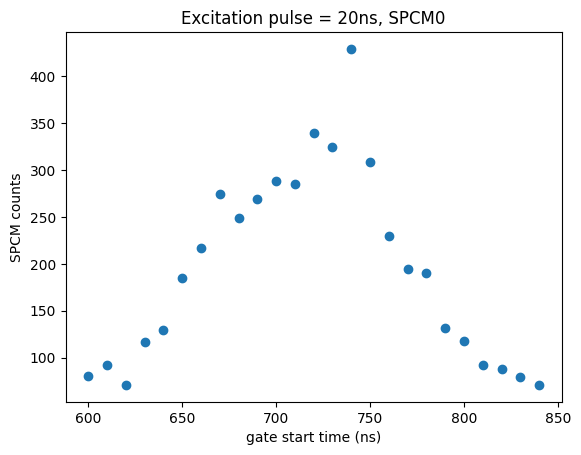

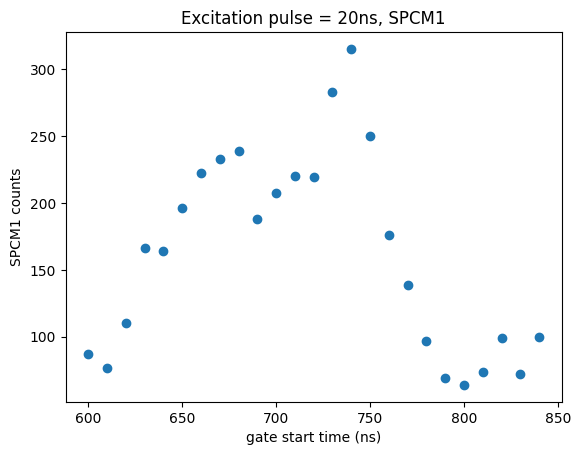

In [15]:
i = 1
f = h5py.File(os.path.join(results, fnames[i]))
rid = f['rid'][()]
h5_archive_and_datasets_to_locals(f, parent_locals=locals(), quiet=True)

print(f"n_measurements = {n_measurements}")
print(f"exc_pulse_length_mu = {exc_pulse_length_mu}")
print(f"gate_pulse_length_mu = {gate_pulse_length_mu}")

SPCM_counts_array = locals()["SPCM_counts_array"][1:]
SPCM_counts1_array = locals()["SPCM_counts1_array"][1:]
t_pulse_mu_list = eval(locals()["t_pulse_mu_list"])

plt.scatter(t_pulse_mu_list,SPCM_counts_array)
plt.xlabel('gate start time (ns)')
plt.ylabel('SPCM counts')
plt.title('Excitation pulse = 20ns, SPCM0')
plt.show()

plt.scatter(t_pulse_mu_list,SPCM_counts1_array)
plt.xlabel('gate start time (ns)')
plt.ylabel('SPCM1 counts')
plt.title('Excitation pulse = 20ns, SPCM1')
plt.show()

### Excitation Pulse = 30ns, n_measurements = 10^7 

n_measurements = 10000000
exc_pulse_length_mu = 30
gate_pulse_length_mu = 100


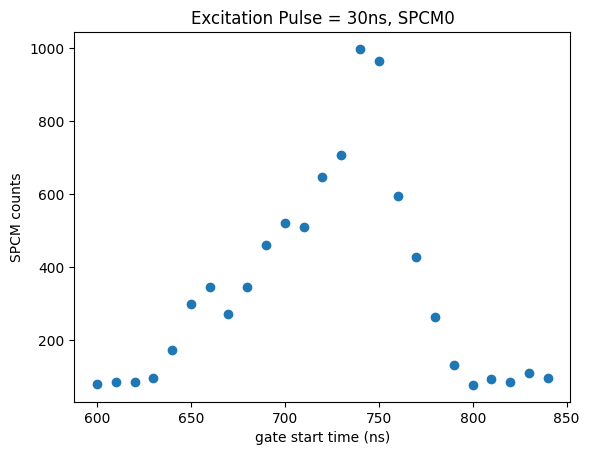

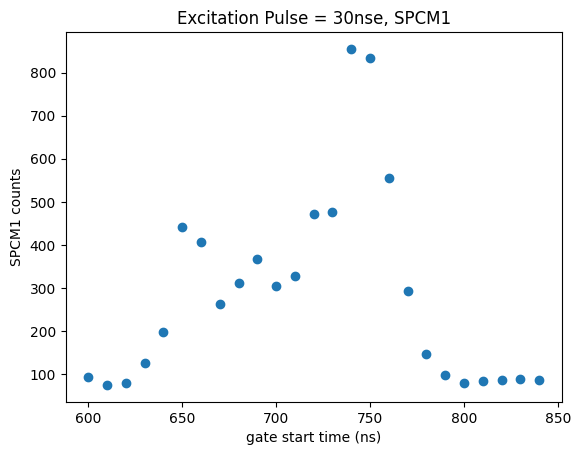

In [14]:
i = 0
f = h5py.File(os.path.join(results, fnames[i]))
rid = f['rid'][()]
h5_archive_and_datasets_to_locals(f, parent_locals=locals(), quiet=True)

print(f"n_measurements = {n_measurements}")
print(f"exc_pulse_length_mu = {exc_pulse_length_mu}")
print(f"gate_pulse_length_mu = {gate_pulse_length_mu}")

SPCM_counts_array = locals()["SPCM_counts_array"][1:]
SPCM_counts1_array = locals()["SPCM_counts1_array"][1:]
t_pulse_mu_list = eval(locals()["t_pulse_mu_list"])

plt.scatter(t_pulse_mu_list,SPCM_counts_array)
plt.xlabel('gate start time (ns)')
plt.ylabel('SPCM counts')
plt.title('Excitation Pulse = 30ns, SPCM0')
plt.show()

plt.scatter(t_pulse_mu_list,SPCM_counts1_array)
plt.xlabel('gate start time (ns)')
plt.ylabel('SPCM1 counts')
plt.title('Excitation Pulse = 30nse, SPCM1')
plt.show()

### 2024.12.17

In [3]:
fnames = get_files_by_criteria(date_filters=["2024-12-16"], # only find files from these dates. to include all dates in the 20s, do 2024-05-2
                               name_filters=["SPCM"], # only find files containing all these strings
                               condition=lambda filename: True, # use this to filter by experiment parameters, like this: lambda filename: np.bool_(h5py.File(filename)['datasets']['set_current_coil_volts_at_finish'])
                               start_dir=results,
                               include_path=True, # only return the name of the file, not the full path
                               print_filenames=True
)
print(f"found {len(fnames)} files")
rid_list = []

scan_dictionary = {}
for i,f in enumerate(fnames):
    try:
        file = h5py.File(os.path.join(results, f))
        rid = file['rid'][()]
        if rid not in rid_list:
            rid_list.append(rid)
            ds = file['datasets']
    except OSError:
        pass # if rid wasn't in the file, its corrupt
    finally:
        file.close()
print(f"skipped {len(fnames)-len(rid_list)} redundant files")
scan_groups = {}

for key,val in scan_dictionary.items():
    if not val in scan_groups:
        scan_groups[val] = []
    scan_groups[val].append(key)
print(f"{len(scan_groups)} scan_variables over {len(scan_dictionary)} variable scans")

found 14 files
skipped 0 redundant files
0 scan_variables over 0 variable scans


### 2024.12.12

In [19]:
fnames = get_files_by_criteria(date_filters=["2024-12-12"], # only find files from these dates. to include all dates in the 20s, do 2024-05-2
                               name_filters=["SPCM"], # only find files containing all these strings
                               condition=lambda filename: True, # use this to filter by experiment parameters, like this: lambda filename: np.bool_(h5py.File(filename)['datasets']['set_current_coil_volts_at_finish'])
                               start_dir=results,
                               include_path=True, # only return the name of the file, not the full path
                               print_filenames=True
)
print(f"found {len(fnames)} files")
rid_list = []

scan_dictionary = {}
for i,f in enumerate(fnames):
    try:
        file = h5py.File(os.path.join(results, f))
        rid = file['rid'][()]
        if rid not in rid_list:
            rid_list.append(rid)
            ds = file['datasets']
    except OSError:
        pass # if rid wasn't in the file, its corrupt
    finally:
        file.close()
print(f"skipped {len(fnames)-len(rid_list)} redundant files")
scan_groups = {}

for key,val in scan_dictionary.items():
    if not val in scan_groups:
        scan_groups[val] = []
    scan_groups[val].append(key)
print(f"{len(scan_groups)} scan_variables over {len(scan_dictionary)} variable scans")

skipping C:\Networking Experiment\artiq codes\artiq-master\results\2024-12-12\17\000020436-ExcitationSPCMGateStartTime.h5, which is corrupt
found 44 files
skipped 0 redundant files
0 scan_variables over 0 variable scans


In [19]:
fnames = get_files_by_criteria(date_filters=["2024-12-12", "2024-12-13"], # only find files from these date directories
                               name_filters=["SPCM"], # only find files containing all these strings
                               condition=lambda filename: True, # use this to filter by experiment parameters, like this: lambda filename: np.bool_(h5py.File(filename)['datasets']['set_current_coil_volts_at_finish'])
                               start_dir=results,
                               include_path=True, # if False, only return the name of the file, not the full path
                               print_filenames=True
)

only_show_i_greater_than = -1

print(f"found {len(fnames)} files")
for i,f in enumerate(fnames):
    ds = h5py.File(os.path.join(results, f))['datasets']
    print(f"file {i} ({f})")
    # scan_str = str_from_h5(ds['scan_variable1_name'])
    # if str_from_h5(ds['scan_variable2_name']) != '':
    #     scan_str += ", " +str_from_h5(ds['scan_variable2_name'])
    # print(f"file {i} ({f}) scanned over "+scan_str)


skipping C:\Networking Experiment\artiq codes\artiq-master\results\2024-12-12\17\000020436-ExcitationSPCMGateStartTime.h5, which is corrupt
found 44 files
file 0 (C:\Networking Experiment\artiq codes\artiq-master\results\2024-12-12\10\000020364-SPCMGateTimeVsCounts.h5)
file 1 (C:\Networking Experiment\artiq codes\artiq-master\results\2024-12-12\10\000020365-SPCMGateTimeVsCounts.h5)
file 2 (C:\Networking Experiment\artiq codes\artiq-master\results\2024-12-12\10\000020367-SPCMGateTimeVsCounts.h5)
file 3 (C:\Networking Experiment\artiq codes\artiq-master\results\2024-12-12\16\000020394-ExcitationSPCMGateStartTime.h5)
file 4 (C:\Networking Experiment\artiq codes\artiq-master\results\2024-12-12\16\000020395-ExcitationSPCMGateStartTime.h5)
file 5 (C:\Networking Experiment\artiq codes\artiq-master\results\2024-12-12\16\000020396-ExcitationSPCMGateStartTime.h5)
file 6 (C:\Networking Experiment\artiq codes\artiq-master\results\2024-12-12\16\000020397-ExcitationSPCMGateStartTime.h5)
file 7 (C:\N

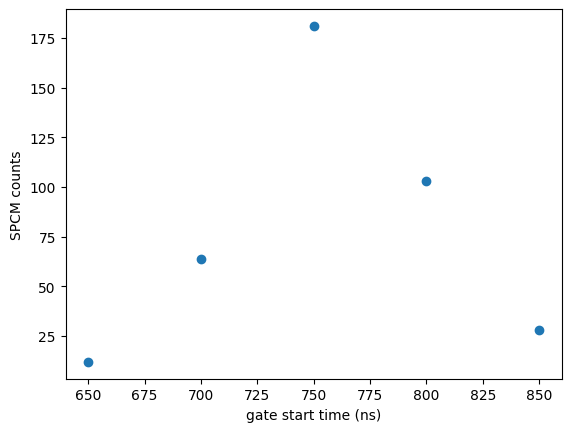

In [80]:
i = 39
f = h5py.File(os.path.join(results, fnames[i]))
rid = f['rid'][()]
h5_archive_and_datasets_to_locals(f, parent_locals=locals(), quiet=True)
fnames[43]



SPCM_counts_array = locals()["SPCM_counts_array"][1:]
t_pulse_mu_list = eval(locals()["t_pulse_mu_list"])

plt.scatter(t_pulse_mu_list,SPCM_counts_array)
plt.xlabel('gate start time (ns)')
plt.ylabel('SPCM counts')
plt.show()

In [78]:
SPCM_counts_array

array([150., 149., 169., 210., 263., 284., 273., 363., 287., 322., 291.,
       307., 275., 245., 158., 143.,  99.,  71.,  95.,  66.])

### Excitation Pulse = 20ns, n_measurements = 10^7 

n_measurements = 10000000
exc_pulse_length_mu = 20
gate_pulse_length_mu = 100


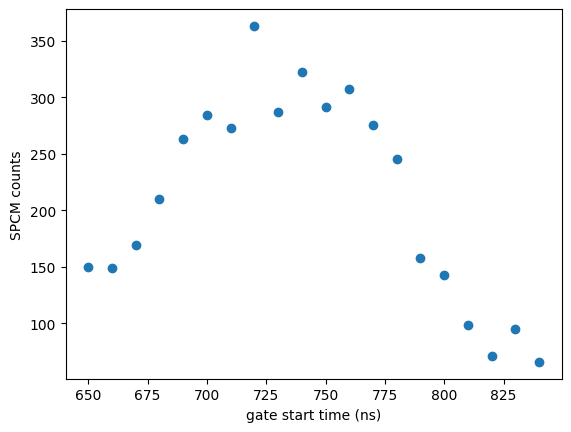

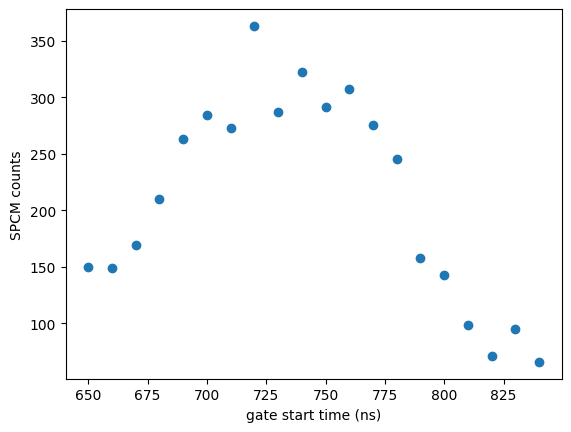

In [20]:
i = 43
f = h5py.File(os.path.join(results, fnames[i]))
rid = f['rid'][()]
h5_archive_and_datasets_to_locals(f, parent_locals=locals(), quiet=True)
fnames[43]

print(f"n_measurements = {n_measurements}")
print(f"exc_pulse_length_mu = {exc_pulse_length_mu}")
print(f"gate_pulse_length_mu = {gate_pulse_length_mu}")

SPCM_counts_array = locals()["SPCM_counts_array"][1:]
SPCM_counts1_array = locals()["SPCM_counts1_array"][1:]
t_pulse_mu_list = eval(locals()["t_pulse_mu_list"])

plt.scatter(t_pulse_mu_list,SPCM_counts_array)
plt.xlabel('gate start time (ns)')
plt.ylabel('SPCM counts')
plt.show()

plt.scatter(t_pulse_mu_list,SPCM_counts1_array)
plt.xlabel('gate start time (ns)')
plt.ylabel('SPCM counts')
plt.show()

In [21]:
SPCM_counts_array

array([150., 149., 169., 210., 263., 284., 273., 363., 287., 322., 291.,
       307., 275., 245., 158., 143.,  99.,  71.,  95.,  66.])

In [22]:
SPCM_counts1_array

array([150., 149., 169., 210., 263., 284., 273., 363., 287., 322., 291.,
       307., 275., 245., 158., 143.,  99.,  71.,  95.,  66.])

### Excitation Pulse = 30ns, n_measurements = 10^6

n_measurements = 1000000
exc_pulse_length_mu = 30
gate_pulse_length_mu = 100


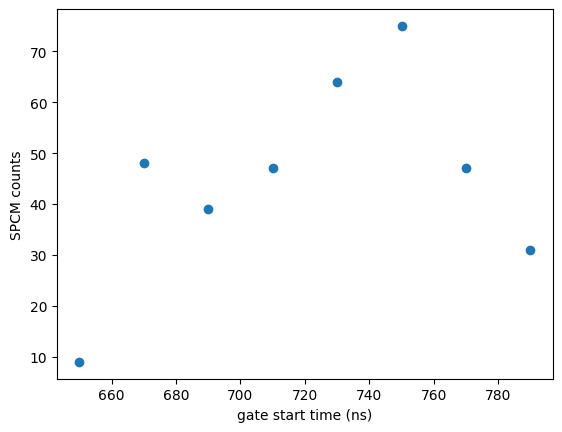

In [74]:
i = 42
f = h5py.File(os.path.join(results, fnames[i]))
rid = f['rid'][()]
h5_archive_and_datasets_to_locals(f, parent_locals=locals(), quiet=True)
fnames[43]

print(f"n_measurements = {n_measurements}")
print(f"exc_pulse_length_mu = {exc_pulse_length_mu}")
print(f"gate_pulse_length_mu = {gate_pulse_length_mu}")

SPCM_counts_array = locals()["SPCM_counts_array"][1:]
t_pulse_mu_list = eval(locals()["t_pulse_mu_list"])

plt.scatter(t_pulse_mu_list,SPCM_counts_array)
plt.xlabel('gate start time (ns)')
plt.ylabel('SPCM counts')
plt.show()

n_measurements = 1000000
exc_pulse_length_mu = 100
gate_pulse_length_mu = 200


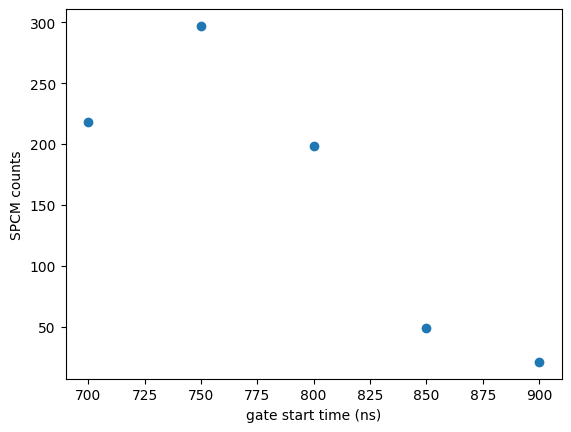

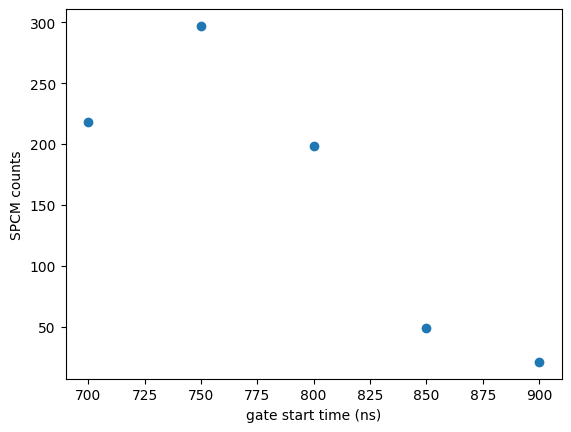

In [97]:
i = 38
f = h5py.File(os.path.join(results, fnames[i]))
rid = f['rid'][()]
h5_archive_and_datasets_to_locals(f, parent_locals=locals(), quiet=True)

print(f"n_measurements = {n_measurements}")
print(f"exc_pulse_length_mu = {exc_pulse_length_mu}")
print(f"gate_pulse_length_mu = {gate_pulse_length_mu}")

SPCM_counts_array = locals()["SPCM_counts_array"][1:]
SPCM_counts1_array = locals()["SPCM_counts1_array"][1:]
t_pulse_mu_list = eval(locals()["t_pulse_mu_list"])

plt.scatter(t_pulse_mu_list,SPCM_counts_array)
plt.xlabel('gate start time (ns)')
plt.ylabel('SPCM counts')
plt.show()

plt.scatter(t_pulse_mu_list,SPCM_counts1_array)
plt.xlabel('gate start time (ns)')
plt.ylabel('SPCM counts')
plt.show()